# Kreditwürdigkeit


### [KR01] Einlesen der CSV Files


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('data/loan_approval_0.csv', delimiter='|')
df1 = pd.read_csv('data/loan_approval_1.csv', delimiter='|')
df2 = pd.read_csv('data/loan_approval_2.csv', delimiter='|')
df3 = pd.read_csv('data/loan_approval_3.csv', delimiter='|')
df4 = pd.read_csv('data/loan_approval_4.csv', delimiter='|')

### [KR02] Zusammenfassung der DataFrames


In [3]:
frames = [df0, df1, df2, df3, df4]

#Mergen der Frames
df = pd.concat(frames, ignore_index=True)

df

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,-,27471,Male,True,1,Not Graduate,True,4251,34868.0,30000,300,1,CCR,1
1,-,27472,Male,False,1,Graduate,False,23399,30710.0,30000,60,1,OCR,1
2,-,27473,Female,False,4,Not Graduate,True,68684,13669.0,50000,180,1,OCR,1
3,-,27474,Male,False,3,Graduate,True,19825,20862.0,10000,360,0,OCR,1
4,-,27475,Male,True,3,Not Graduate,True,65643,15199.0,60000,240,0,OCR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,-,25231,Female,True,0,Not Graduate,True,74961,18796.0,20000,240,0,CCR,0
4834,-,25232,Male,False,3,Not Graduate,True,59475,9950.0,10000,60,0,CCR,1
4835,-,25233,Male,True,1,Graduate,False,26043,43140.0,50000,240,1,OCR,1
4836,-,25234,Female,False,0,Not Graduate,False,98394,19963.0,40000,120,1,OCR,1


### [KR03] Identifikation von Daten Problemen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Num_Kids            4838 non-null   object 
 1   Loan_ID             4838 non-null   int64  
 2   Gender              4835 non-null   object 
 3   Married             4838 non-null   object 
 4   Dependent_No        4838 non-null   int64  
 5   Education           4838 non-null   object 
 6   Self_Employed       4838 non-null   bool   
 7   Applicant_Income    4838 non-null   int64  
 8   CoApplicant_Income  4330 non-null   float64
 9   Loan_Amount         4838 non-null   int64  
 10  Loan_Amount_Term    4838 non-null   int64  
 11  Credit History      4838 non-null   int64  
 12  Property_District   4838 non-null   object 
 13  Loan_Status         4838 non-null   int64  
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 496.2+ KB


In [5]:
df.describe(include="all")

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
count,4838,4838.000000,4835,4838,4838.000000,4838,4838,4838.000000,4330.000000,4838.000000,4838.000000,4838.000000,4838,4838.000000
unique,1,NaN,8,6,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN
top,-,NaN,Male,True,NaN,Not Graduate,True,NaN,NaN,NaN,NaN,NaN,OCR,NaN
freq,4838,NaN,3256,1949,NaN,2858,2890,NaN,NaN,NaN,NaN,NaN,2431,NaN
mean,NaN,25774.881356,NaN,NaN,1.997520,NaN,NaN,51012.898718,25282.111085,35374.121538,212.542373,0.667011,NaN,0.663497
std,NaN,1612.697042,NaN,NaN,1.417132,NaN,NaN,29308.510339,14177.039556,17150.013908,102.907624,0.471331,NaN,0.472562
min,NaN,23002.000000,NaN,NaN,0.000000,NaN,NaN,-50000.000000,1002.000000,10000.000000,60.000000,0.000000,NaN,0.000000
25%,NaN,24379.250000,NaN,NaN,1.000000,NaN,NaN,26461.000000,13312.000000,20000.000000,120.000000,0.000000,NaN,0.000000
50%,NaN,25760.500000,NaN,NaN,2.000000,NaN,NaN,51473.500000,25075.000000,40000.000000,240.000000,1.000000,NaN,1.000000
75%,NaN,27182.750000,NaN,NaN,3.000000,NaN,NaN,76143.500000,37733.000000,50000.000000,300.000000,1.000000,NaN,1.000000


In [6]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())

['Male' 'Female' 'm' 'M' 'female' 'male' 'F' '-' nan]
[True False 'True' 'False' 'Yes' 'No']
['Not Graduate' 'Graduate']


In [7]:
df.loc[
    df['Gender'] == 'nan'
]

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status


In [8]:
duplicateRows = df[df.duplicated(keep='first')]

duplicateRows

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
11,-,27483,Male,False,3,Not Graduate,False,83867,NaN,30000,60,0,OCR,1
57,-,27534,Female,True,4,Graduate,True,81632,27268.0,50000,360,1,OCR,0
110,-,27595,Male,False,3,Not Graduate,False,59548,45543.0,10000,360,1,OCR,0
2918,-,23070,Male,False,4,Not Graduate,True,69371,15703.0,60000,60,1,OCR,1
2966,-,23128,Male,False,1,Graduate,False,86903,13345.0,40000,120,1,OCR,1


In [9]:
df = df.drop_duplicates()
duplicateRows = df[df.duplicated()]

duplicateRows

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status


In [10]:
df["Loan_ID"].duplicated().unique()

array([False])

In [11]:
df.isna().sum()

Num_Kids                0
Loan_ID                 0
Gender                  3
Married                 0
Dependent_No            0
Education               0
Self_Employed           0
Applicant_Income        0
CoApplicant_Income    507
Loan_Amount             0
Loan_Amount_Term        0
Credit History          0
Property_District       0
Loan_Status             0
dtype: int64

### [KR04] Visualisierung der Zielklasse


In [12]:
# Kredithistorie: Informationen wie die Person in der Vergangenheit mit Krediten und Schulden umgegangen ist (verspätete Zahlungen, Kreditlimits, etc.)
# Lohnstatus: Informationen, wie viel Geld eine Person verdient. Gibt Kreditgebern Einblick in finanzielle Stabilität der Person und Ihre Fähigkeit, Kredite zurückzuzahlen.
# CoApplicant_Income: Gehalt des Mitantragstellers (zweite Person) --> ergibt Gesamtkredidwürdigkeit
# Loan Amount = Kreditbetrag
# Loan Amount Term = Laufzeit des Kreditbetrags

# WICHTIG für Zielklassenbestimmung
# Incomes Zusammenrechnen

urban_region = [(df['Loan_Status'] == 1)]

### [KR05] Anzahl Duplikate


In [13]:
duplicateRows = df[df.duplicated(keep='first')]
duplicateRows2 = df[df.duplicated(keep='last')]

dfdp = pd.concat([duplicateRows, duplicateRows2], ignore_index=True).sort_values('Loan_ID')
dfdp

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status


In [14]:
# Duplikate rauswerfen

print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(4833, 14)
(4833, 14)


### [KR06] Kredite in der urbanen Gegend


In [15]:
# Fragen ob was mit urban = städtisch alles gemeint ist (nur Core Central Region?)
# Und mit Kredite, Historie oder Kreditwürdigkeit gefragt?

urban_region = df.loc[(df['Property_District']  == 'CCR')]
urban_region [(df['Credit History'] == 1)]


C:\Users\Pascal\AppData\Local\Temp\ipykernel_7680\1703561595.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  urban_region [(df['Credit History'] == 1)]


,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,-,27471,Male,True,1,Not Graduate,True,4251,34868.0,30000,300,1,CCR,1
21,-,27495,Female,False,4,Not Graduate,True,44880,NaN,10000,60,1,CCR,1
26,-,27500,Male,False,1,Not Graduate,True,46656,46954.0,60000,120,1,CCR,0
29,-,27504,Female,True,0,Not Graduate,True,94400,32281.0,40000,180,1,CCR,1
41,-,27517,Male,True,1,Not Graduate,False,99836,18851.0,50000,180,1,CCR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,-,25217,Female,True,3,Not Graduate,True,7014,48628.0,20000,120,1,CCR,1
4822,-,25220,Male,False,4,Graduate,True,76423,NaN,30000,120,1,CCR,1
4826,-,25224,Male,False,2,Graduate,True,25021,46895.0,30000,360,1,CCR,1
4828,-,25226,Female,False,0,Not Graduate,True,89527,26544.0,60000,120,1,CCR,0


### [KR07] Durchschnittseinkommen


In [16]:
average_loan = round(df['Loan_Amount'].mean())
average_loan

35371

### [KR08] Bildungsstatus höchstes Einkommen


In [17]:
graduated_max_loan = df[df['Education'] == 'Graduate']['Loan_Amount'].max()
not_graduated_max_loan = df[df['Education'] == 'Not Graduate']['Loan_Amount'].max()

print('Höchstes Einkommen von Absolventen :', graduated_max_loan)
print('Höchstes Einkommen von nicht-Absolventen:', not_graduated_max_loan)

Höchstes Einkommen von Absolventen : 60000
Höchstes Einkommen von nicht-Absolventen: 60000


### [KR09] Identifikation von Ausreißern beim Einkommen


In [18]:
df['Applicant_Income'].describe()

count      4833.000000
mean      50986.774881
std       29310.546571
min      -50000.000000
25%       26460.000000
50%       51426.000000
75%       76109.000000
max      500000.000000
Name: Applicant_Income, dtype: float64

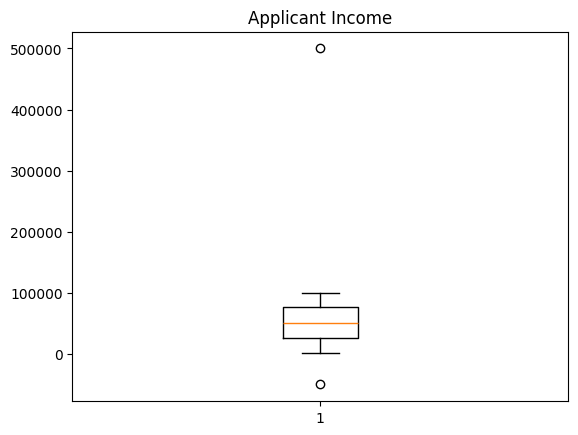

In [19]:
fig, ax = plt.subplots()

data = df['Applicant_Income']
ax.set_title('Applicant Income')
ax.boxplot(data)

plt.show()

In [20]:
df.loc[
    (df['Applicant_Income'] > 200000) | (df['Applicant_Income'] < 0)
]

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
2914,-,23067,Male,False,0,Graduate,True,-50000,47086.0,50000,60,1,OCR,1
3518,-,23753,Female,True,0,Graduate,False,500000,13660.0,10000,300,0,CCR,0


In [21]:
median_app_income = df['Applicant_Income'].median()
print(median_app_income)

51426.0


In [22]:
df.loc[(df['Applicant_Income'] > 200000) | (df['Applicant_Income'] < 0), 'Applicant_Income'] = median_app_income

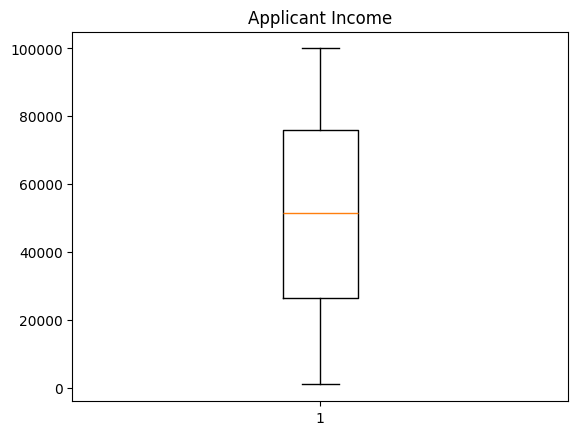

In [23]:
fig, ax = plt.subplots()

data = df['Applicant_Income']
ax.set_title('Applicant Income')
ax.boxplot(data)

plt.show()

In [24]:
df['Applicant_Income'].describe()

count     4833.000000
mean     50914.946203
std      28552.897565
min       1002.000000
25%      26461.000000
50%      51426.000000
75%      76092.000000
max      99987.000000
Name: Applicant_Income, dtype: float64

In [25]:
#Co-Applicant
df["CoApplicant_Income"].info()

<class 'pandas.core.series.Series'>
Index: 4833 entries, 0 to 4837
Series name: CoApplicant_Income
Non-Null Count  Dtype  
--------------  -----  
4326 non-null   float64
dtypes: float64(1)
memory usage: 204.6 KB


In [26]:
df["CoApplicant_Income"].isna().sum()

507

In [27]:
median_co_income = df['Applicant_Income'].median()
print(median_co_income)

51426.0


In [28]:
df['CoApplicant_Income'] = df['CoApplicant_Income'].fillna(median_co_income)

In [29]:
df["CoApplicant_Income"].isna().sum()

0

In [30]:
df["CoApplicant_Income"].median()

27824.0

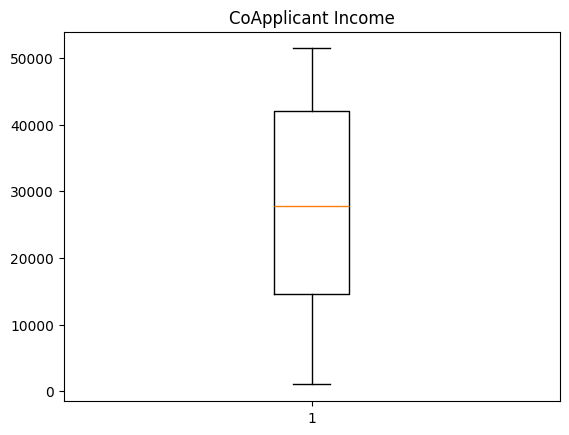

In [31]:
fig, ax = plt.subplots()

data = df['CoApplicant_Income']
ax.set_title('CoApplicant Income')
data = data.apply(int)
ax.boxplot(data)

plt.show()

### [KR10] Co-Auftragsteller Vergleich


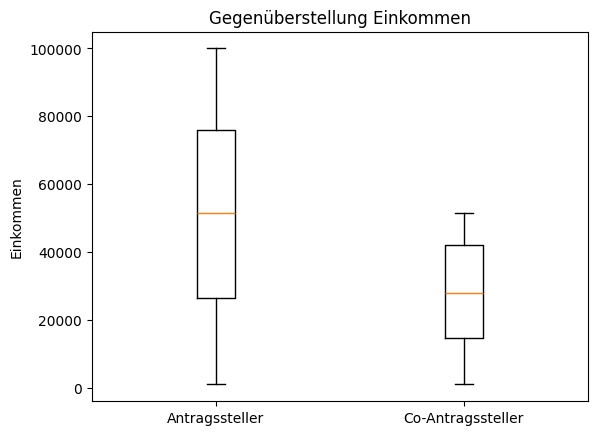

In [32]:
fig, ax = plt.subplots()
ax.boxplot(
    df[['Applicant_Income', 'CoApplicant_Income']],
    labels=['Antragssteller', 'Co-Antragssteller']
    )
ax.set_title('Gegenüberstellung Einkommen')
ax.set_ylabel("Einkommen")

plt.show()

### [KR11] Verteilung der Kredithöhe zum Bildungsabschluss


In [33]:
education=df['Education']
education.sample(3)
education.unique()
LoanAmount = df['Loan_Amount']
LoanAmount.unique()

array([30000, 50000, 10000, 60000, 40000, 20000], dtype=int64)

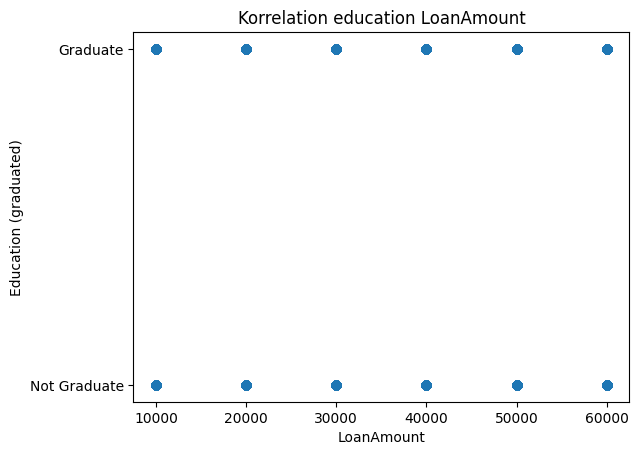

In [34]:
fig, ax = plt.subplots()

ax.scatter(LoanAmount, education)
ax.set_title("Korrelation education LoanAmount")
ax.set_xlabel("LoanAmount")
ax.set_ylabel("Education (graduated)")
plt.show()

In [35]:
df_graduated = df[df['Education'] == 'Graduate']
df_graduated
df_notGraduate = df[df['Education'] != 'Graduate']
df_notGraduate

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,-,27471,Male,True,1,Not Graduate,True,4251,34868.0,30000,300,1,CCR,1
2,-,27473,Female,False,4,Not Graduate,True,68684,13669.0,50000,180,1,OCR,1
4,-,27475,Male,True,3,Not Graduate,True,65643,15199.0,60000,240,0,OCR,1
5,-,27476,Female,True,4,Not Graduate,False,14015,27503.0,40000,60,1,RCR,0
7,-,27479,Male,False,4,Not Graduate,True,74074,26090.0,40000,120,1,RCR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,-,25229,Male,True,1,Not Graduate,False,33958,38272.0,50000,120,0,CCR,1
4832,-,25230,Female,True,1,Not Graduate,True,60519,5421.0,50000,240,1,OCR,1
4833,-,25231,Female,True,0,Not Graduate,True,74961,18796.0,20000,240,0,CCR,0
4834,-,25232,Male,False,3,Not Graduate,True,59475,9950.0,10000,60,0,CCR,1


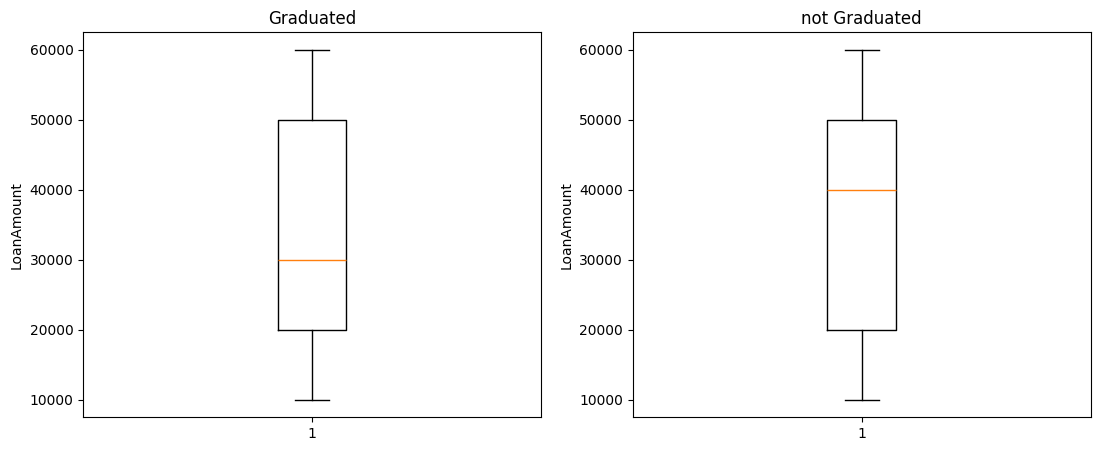

In [36]:
fig, (ax, bx) = plt.subplots(ncols=2, figsize=(13,5))
ax.boxplot(df_graduated['Loan_Amount'])
ax.set_title("Graduated")
ax.set_ylabel("LoanAmount")
bx.boxplot(df_notGraduate['Loan_Amount'])
bx.set_title("not Graduated")
bx.set_ylabel("LoanAmount")
plt.show()

In [37]:
averageGraduated = df_graduated['Loan_Amount'].mean()
averageNotGraduate = df_notGraduate['Loan_Amount'].mean()
print("Average loan of graduated:", averageGraduated)
print("Average loan of not graduated:",averageNotGraduate)

Average loan of graduated: 34651.16279069767
Average loan of not graduated: 35870.40280210158


### [KR12] Kreditstatus basierend auf Kredithöhe


In [38]:
df.keys()

Index(['Num_Kids', 'Loan_ID', 'Gender', 'Married', 'Dependent_No', 'Education',
       'Self_Employed', 'Applicant_Income', 'CoApplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit History',
       'Property_District', 'Loan_Status'],
      dtype='object')

In [39]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [40]:
df['Loan_Amount'].unique()

array([30000, 50000, 10000, 60000, 40000, 20000], dtype=int64)

In [41]:
loanGranted = df[df['Loan_Status']==1]
loanNotGranted = df[df['Loan_Status']==0]

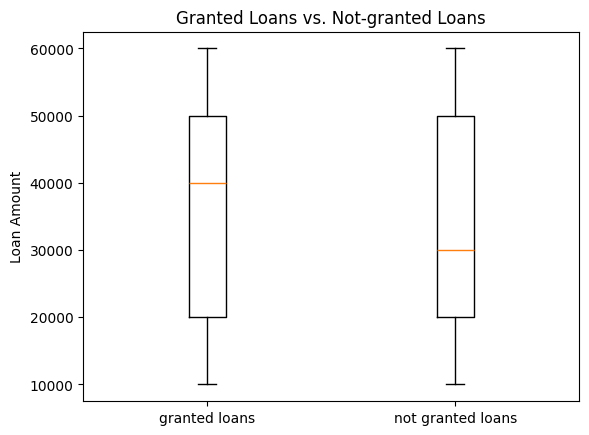

In [42]:
fig, ax = plt.subplots()
ax.boxplot([loanGranted['Loan_Amount'],loanNotGranted['Loan_Amount']],
labels = ["granted loans", "not granted loans"])
ax.set_title("Granted Loans vs. Not-granted Loans")
ax.set_ylabel("Loan Amount")
plt.show()

### [KR13] Visualisierung der Zielvariable


In [43]:
df.loc[
    (df['Applicant_Income'] > 200000) | (df['Applicant_Income'] < 0)
]

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status


In [44]:
total_income_median = df['Applicant_Income'].median()
df.loc[(df['Applicant_Income'] > 200000) | (df['Applicant_Income'] < 0), 'Applicant_Income'] = total_income_median

In [45]:
df.loc[[2914, 3518]]

,Num_Kids,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
2914,-,23067,Male,False,0,Graduate,True,51426,47086.0,50000,60,1,OCR,1
3518,-,23753,Female,True,0,Graduate,False,51426,13660.0,10000,300,0,CCR,0


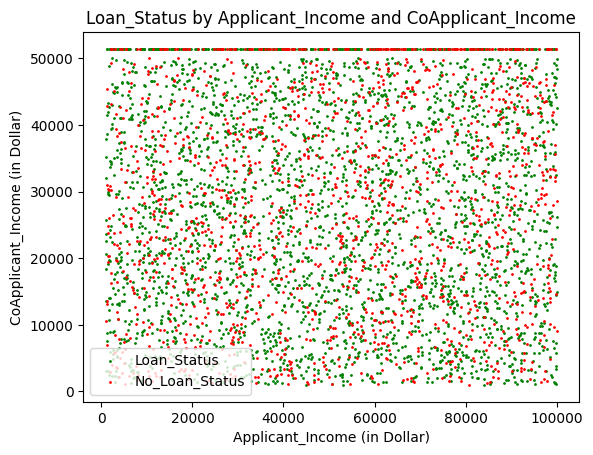

In [46]:
no_loan_status_df = df[df["Loan_Status"] == 0]
loan_status_df = df[df["Loan_Status"] == 1]

fig, ax = plt.subplots()

ax.scatter(loan_status_df["Applicant_Income"], loan_status_df["CoApplicant_Income"], c="g", s=1, label="Loan_Status")
ax.scatter(no_loan_status_df["Applicant_Income"], no_loan_status_df["CoApplicant_Income"], c="r", s=1, label="No_Loan_Status")
ax.set_xlabel("Applicant_Income (in Dollar)")
ax.set_ylabel("CoApplicant_Income (in Dollar)")
ax.set_title("Loan_Status by Applicant_Income and CoApplicant_Income")
ax.legend()
plt.show()

### [KR14] Höhe des Kredits basierend auf Ehestatus


In [47]:
# Vereinheitlichung auf True und False
 
df.loc[df['Married'] == 'True', 'Married'] = True
df.loc[df['Married'] == 'False', 'Married'] = False

df.loc[df['Married'] == 'Yes', 'Married'] = True
df.loc[df['Married'] == 'No', 'Married'] = False

df['Married'].unique()

array([True, False], dtype=object)

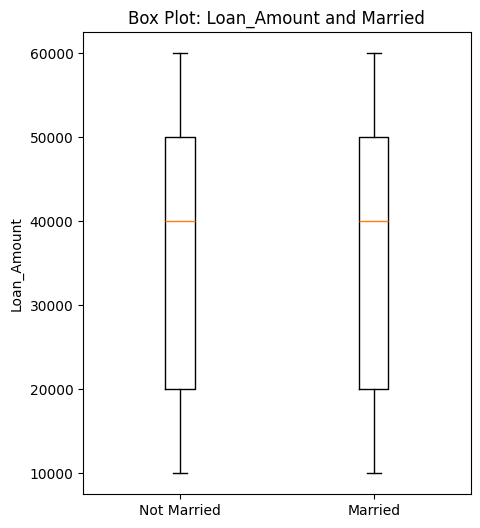

In [48]:
not_married_df = df[df["Married"] == False]['Loan_Amount']
married_df = df[df["Married"] == True]['Loan_Amount']

fig, ax = plt.subplots(figsize=(5,6))

ax.boxplot([not_married_df, married_df])
ax.set_ylabel('Loan_Amount')
ax.set_xticklabels(['Not Married', 'Married'])
ax.set_title('Box Plot: Loan_Amount and Married')
plt.show()

### [KR15] Standartisierung Gender


In [49]:
print(df["Gender"].unique())
df = df.replace("male", "m").replace("M", "m").replace("Male", "m"). replace("female", "f").replace("Female", "f").replace("F", "f").replace("-", "d").replace(pd.NA, "d")
print(df["Gender"].unique())
anzahl_m = df['Gender'].value_counts().get('m', 0)
anzahl_f = df['Gender'].value_counts().get('f', 0)
anzahl_d = df['Gender'].value_counts().get('d', 0)
print("Anzahl Männer: "), print(anzahl_m)
print("Anzahl Frauen: "), print(anzahl_f)
print("Anzahl Divers: "), print( anzahl_d)

['Male' 'Female' 'm' 'M' 'female' 'male' 'F' '-' nan]
['m' 'f' 'd']
Anzahl Männer: 
3258
Anzahl Frauen: 
1569
Anzahl Divers: 
6


C:\Users\Pascal\AppData\Local\Temp\ipykernel_7680\1252179546.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("male", "m").replace("M", "m").replace("Male", "m"). replace("female", "f").replace("Female", "f").replace("F", "f").replace("-", "d").replace(pd.NA, "d")


(None, None)

### [KR16] Irrelevante Spalten


In [50]:
df = df.drop(columns=["Num_Kids"])
df

,Loan_ID,Gender,Married,Dependent_No,Education,Self_Employed,Applicant_Income,CoApplicant_Income,Loan_Amount,Loan_Amount_Term,Credit History,Property_District,Loan_Status
0,27471,m,True,1,Not Graduate,True,4251,34868.0,30000,300,1,CCR,1
1,27472,m,False,1,Graduate,False,23399,30710.0,30000,60,1,OCR,1
2,27473,f,False,4,Not Graduate,True,68684,13669.0,50000,180,1,OCR,1
3,27474,m,False,3,Graduate,True,19825,20862.0,10000,360,0,OCR,1
4,27475,m,True,3,Not Graduate,True,65643,15199.0,60000,240,0,OCR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,25231,f,True,0,Not Graduate,True,74961,18796.0,20000,240,0,CCR,0
4834,25232,m,False,3,Not Graduate,True,59475,9950.0,10000,60,0,CCR,1
4835,25233,m,True,1,Graduate,False,26043,43140.0,50000,240,1,OCR,1
4836,25234,f,False,0,Not Graduate,False,98394,19963.0,40000,120,1,OCR,1


### [CR17] Plotting distribution of Applicant Income


In [51]:
df['Applicant_Income'].unique()

array([ 4251, 23399, 68684, ..., 26043, 98394, 46783], dtype=int64)

In [52]:
import math
math.sqrt(len(df['Applicant_Income']))

69.5197813575388

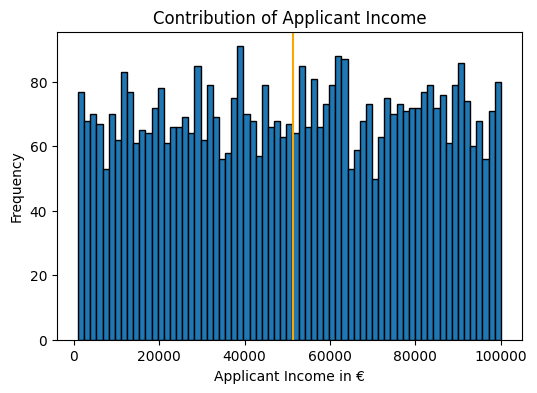

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['Applicant_Income'], bins=int(math.sqrt(len(df['Applicant_Income']))), density=False, edgecolor="black")
ax.axvline(df['Applicant_Income'].median(), color="orange")
ax.set_title("Contribution of Applicant Income")
ax.set_ylabel("Frequency")
ax.set_xlabel("Applicant Income in €")

plt.show()

### [KR18] Contribution of female Co-Applicants Income


In [54]:
female = df[df['Gender']=='f']
fCoApplicants = female['CoApplicant_Income']
fCoApplicants

2       13669.0
5       27503.0
8       27701.0
16      51426.0
17      31183.0
         ...   
4830    51426.0
4832     5421.0
4833    18796.0
4836    19963.0
4837     7726.0
Name: CoApplicant_Income, Length: 1569, dtype: float64

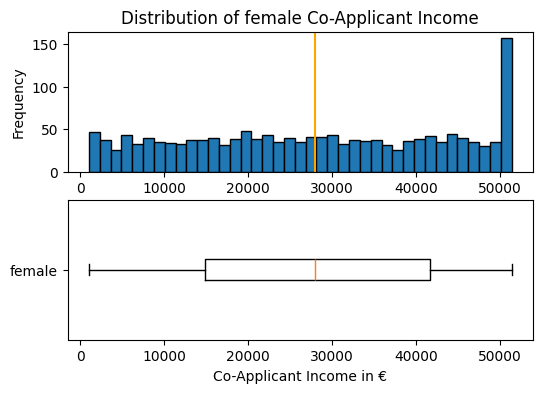

In [55]:
from tkinter import VERTICAL


fig, ax = plt.subplots(2,1, figsize=(6,4))
ax[0].hist(fCoApplicants, bins=int(math.sqrt(len(fCoApplicants))), density=False, edgecolor="black")
ax[0].axvline(fCoApplicants.median(), color="orange")
ax[0].set_title("Distribution of female Co-Applicant Income")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Co-Applicant Income in €")

ax[1].boxplot(fCoApplicants, vert=False)
ax[1].set_yticklabels(["female"])
ax[1].set_xlabel("Co-Applicant Income in €")

plt.show()

# KR19
#### Verteilung Property_District bei Education=Graduate die keinen Loan_Status=0 erhalten

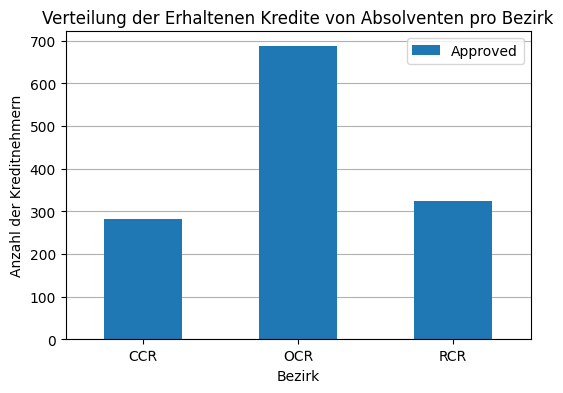

In [57]:
df_complete = df
df_KR19 = df_complete[["Loan_Status", "Education", "Property_District"]]
df_KR19 = df_KR19[(df_KR19['Education'] == 'Graduate')]
df_KR19 = df_KR19[df_KR19['Loan_Status'] != 0]

df_KR19t = df_KR19.pivot_table(index="Property_District", columns="Loan_Status", aggfunc="size")
ax = df_KR19t.plot(kind='bar', figsize=(6, 4))
ax.set_title("Verteilung der Erhaltenen Kredite von Absolventen pro Bezirk")
ax.set_xlabel("Bezirk")
ax.set_ylabel("Anzahl der Kreditnehmern")
ax.set_xticklabels(df_KR19t.index, rotation=.45)
# Ledigliche horizontale Grid Linien
ax.grid(axis='y')
# Horizontale Grid Linie hinter Bars
ax.set_axisbelow(True)
ax.legend(labels=["Approved"])
plt.show()

# KR20
#### Verteilung Ziel Variable (Loan_Status) und Selbstständigkeit(Self_Employed)

2888
3207


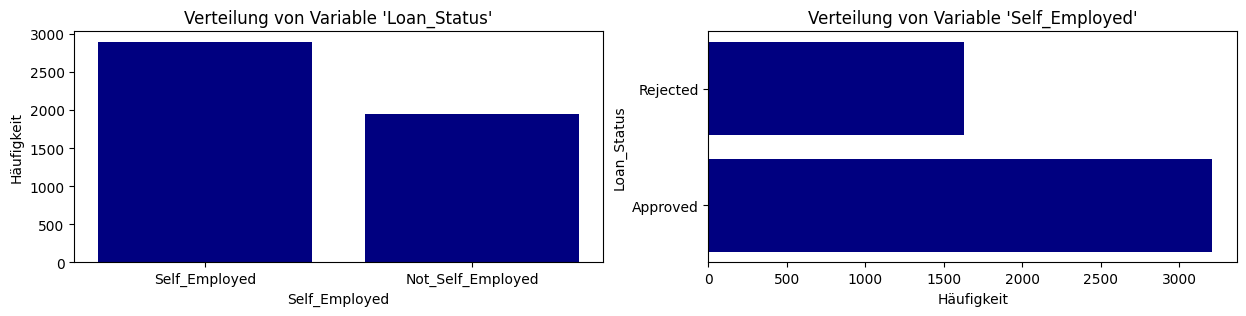

In [58]:
df_KR20 = df_complete[["Loan_Status", "Self_Employed"]]
df_KR20 = df_KR20.replace(0, "Rejected").replace(1, "Approved").replace(True, "Self_Employed").replace(False, "Not_Self_Employed")
#print(df_KR20)
anzahl_l = df_KR20['Loan_Status'].value_counts().get("Approved", 0)
anzahl_s = df_KR20['Self_Employed'].value_counts().get("Self_Employed", 0)
print(anzahl_s)
print(anzahl_l)

df_KR20l = df_KR20["Loan_Status"].value_counts()
df_KR20s = df_KR20["Self_Employed"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(15,3))

ax[0].set_title("Verteilung von Variable 'Loan_Status'")
ax[0].set_xlabel("Self_Employed")
ax[0].set_ylabel("Häufigkeit")
ax[0].bar(df_KR20s.index, df_KR20s.values, tick_label=["Self_Employed","Not_Self_Employed"], color="navy")

ax[1].set_title("Verteilung von Variable 'Self_Employed'")
ax[1].set_xlabel("Häufigkeit")
ax[1].set_ylabel("Loan_Status")
ax[1].barh(df_KR20l.index, df_KR20l.values, tick_label=["Approved","Rejected"], color="navy")

plt.show()

### [KR23] Verteilung des Einkommens aller verheirateter Antragssteller


In [ ]:
df['Married'].info()

<class 'pandas.core.series.Series'>
Index: 4833 entries, 0 to 4837
Series name: Married
Non-Null Count  Dtype
--------------  -----
4833 non-null   bool 
dtypes: bool(1)
memory usage: 171.5 KB


In [ ]:
df['Married'].unique()

array([ True, False])

In [ ]:
unmarried_income_df = df[df["Married"] == False]['Applicant_Income']
married_income_df = df[df["Married"] == True]['Applicant_Income']
married_income_df

0        4251
4       65643
5       14015
6       69916
8       31163
        ...  
4831    33958
4832    60519
4833    74961
4835    26043
4837    46783
Name: Applicant_Income, Length: 2389, dtype: int64

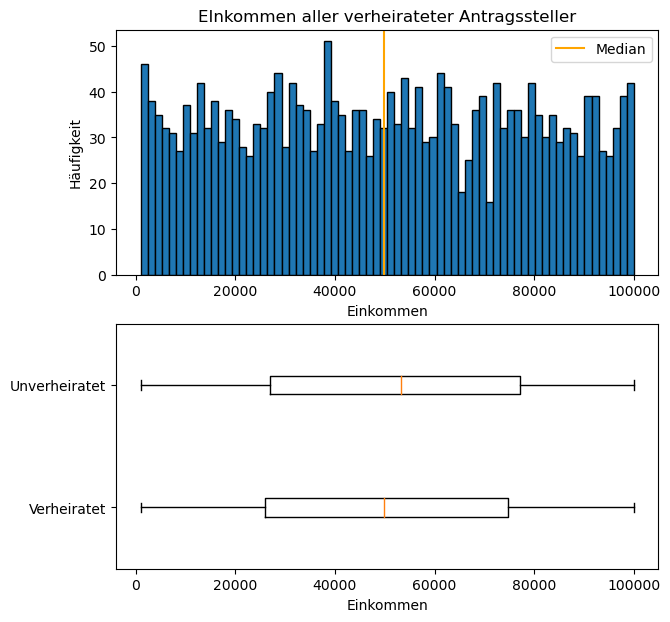

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(7,7))

ax[0].hist(married_income_df, bins=70, edgecolor="black") 

ax[0].axvline(married_income_df.median(), color="orange", label="Median")

ax[0].set_title("EInkommen aller verheirateter Antragssteller")
ax[0].set_ylabel("Häufigkeit")
ax[0].set_xlabel("Einkommen")
ax[0].legend()

ax[1].boxplot([married_income_df, unmarried_income_df], vert=False)
ax[1].set_yticklabels(["Verheiratet", "Unverheiratet"])
ax[1].set_xlabel("Einkommen")
plt.show()